<a href="https://colab.research.google.com/github/nahom-maru/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/titanic_survival_by_nahom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print(" All libraries imported successfully!")

 All libraries imported successfully!


In [ ]:
# Step 2: Load the dataset
url = "https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

NameError: name 'pd' is not defined

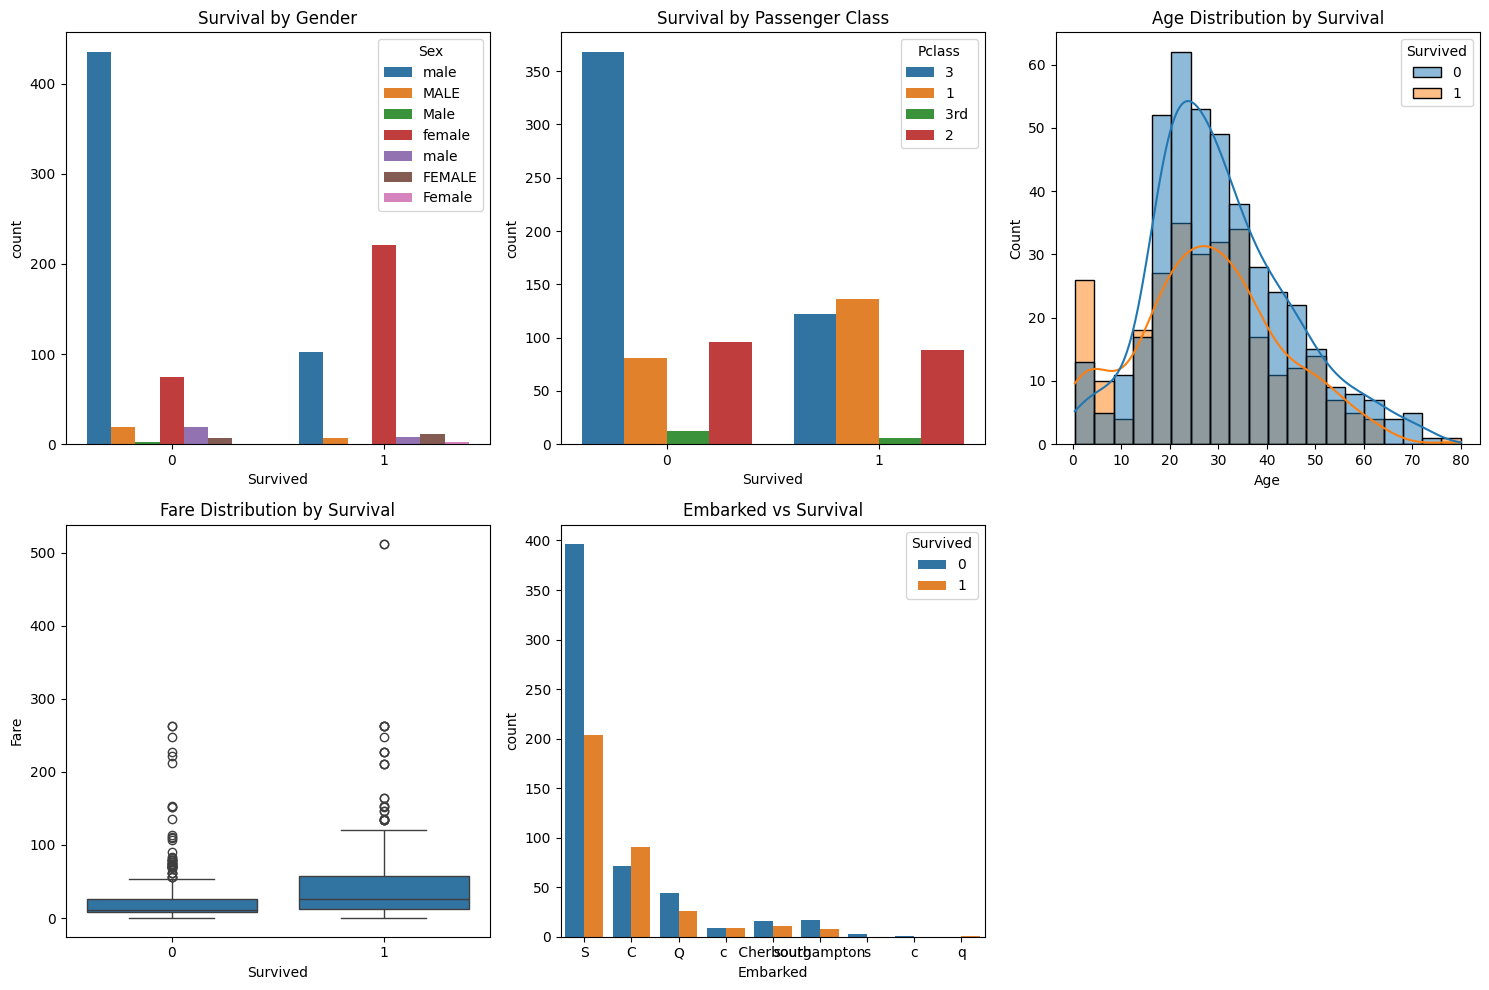

In [ ]:
# Step 3: Data Visualization - Explore the data
plt.figure(figsize=(15, 10))

# Plot 1: Survival count by gender
plt.subplot(2, 3, 1)
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')

# Plot 2: Survival by passenger class
plt.subplot(2, 3, 2)
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')

# Plot 3: Age distribution by survival
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')

# Plot 4: Fare distribution by survival
plt.subplot(2, 3, 4)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')

# Plot 5: Embarked vs Survival
plt.subplot(2, 3, 5)
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarked vs Survival')

plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

print("\nMissing values percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          701
Embarked         0
dtype: int64

Missing values percentage:
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.12
Embarked        0.00
dtype: float64


In [ ]:
# Step 5: Data Cleaning and Preprocessing

# --- Clean Pclass ---
# Ensure Pclass exists
if 'Pclass' in df.columns:
    df['Pclass'] = df['Pclass'].astype(str).str.replace(r'[^0-9]', '', regex=True)
    df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')
    df['Pclass'] = df['Pclass'].fillna(df['Pclass'].mode()[0])

# --- Clean Sex ---
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].astype(str).str.strip().str.lower()
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Sex'] = df['Sex'].fillna(-1)   # Unknown → -1 (safe for ML models)

# --- Clean Age ---
if 'Age' in df.columns:
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df['Age'] = df['Age'].fillna(df['Age'].median())

# --- Clean Fare ---
if 'Fare' in df.columns:
    df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# --- Clean Embarked ---
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].astype(str).str.strip().str.upper()
    df['Embarked'] = df['Embarked'].replace({'': None})
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print(" Data Cleaning Completed (Error-Free)")


 Data Cleaning Completed (Error-Free)


In [ ]:
# Step 6: Advanced Feature Engineering

# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)

# Simplify titles
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                  'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Create Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

# Create Fare groups
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Create Cabin feature (whether passenger had a cabin or not)
df['HasCabin'] = df['Cabin'].notna().astype(int)

print(" Feature engineering completed!")

 Feature engineering completed!


In [ ]:
# Step 7: Encode categorical variables
label_encoder = LabelEncoder()

# Encode Title
df['Title_encoded'] = label_encoder.fit_transform(df['Title'])

# Encode AgeGroup
df['AgeGroup_encoded'] = label_encoder.fit_transform(df['AgeGroup'])

# Encode FareGroup
df['FareGroup_encoded'] = label_encoder.fit_transform(df['FareGroup'])

# Encode Embarked
df['Embarked_encoded'] = label_encoder.fit_transform(df['Embarked'])

print("Categorical encoding completed!")

Categorical encoding completed!


In [ ]:
# Step 8: Select features for modeling
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch',
           'FamilySize', 'IsAlone', 'Title_encoded', 'AgeGroup_encoded',
           'FareGroup_encoded', 'Embarked_encoded', 'HasCabin']

X = df[features]
y = df['Survived']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (909, 13)
Target shape: (909,)


In [ ]:
# Step 9: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (727, 13)
Testing set shape: (182, 13)


In [ ]:
# Step 10: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Feature scaling completed!")

 Feature scaling completed!


In [ ]:
# Step 11: Train multiple models and compare
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Find best model
best_model_name = max(results, key=results.get)
print(f"\n Best Model: {best_model_name} with accuracy: {results[best_model_name]:.4f}")

Random Forest Accuracy: 0.7692
Logistic Regression Accuracy: 0.7198
SVM Accuracy: 0.7033
KNN Accuracy: 0.6703

 Best Model: Random Forest with accuracy: 0.7692


In [ ]:
# Step 12: Hyperparameter Tuning for the Best Model

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ensure best_model_name exists
best_model_name = str(best_model_name).strip()

# ----- Define Parameter Grids Safely -----
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    best_model = RandomForestClassifier(random_state=42)

elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }
    best_model = LogisticRegression(max_iter=2000, random_state=42)

elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
    best_model = SVC(probability=True, random_state=42)

elif best_model_name == 'KNN':
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
    best_model = KNeighborsClassifier()

else:
    raise ValueError(f"Unknown model name: {best_model_name}")


# ----- Run Grid Search -----
grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Use scaled features ONLY for models that require it
if best_model_name in ['Logistic Regression', 'SVM']:
    grid_search.fit(X_train_scaled, y_train)
    best_model_tuned = grid_search.best_estimator_
    y_pred_tuned = best_model_tuned.predict(X_test_scaled)

else:
    grid_search.fit(X_train, y_train)
    best_model_tuned = grid_search.best_estimator_
    y_pred_tuned = best_model_tuned.predict(X_test)


# ----- Output Results -----
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"🎯 Tuned {best_model_name} Accuracy: {tuned_accuracy:.4f}")
print("Best parameters:", grid_search.best_params_)


🎯 Tuned Random Forest Accuracy: 0.7692
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
